In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

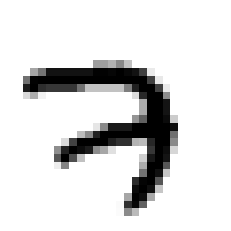

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

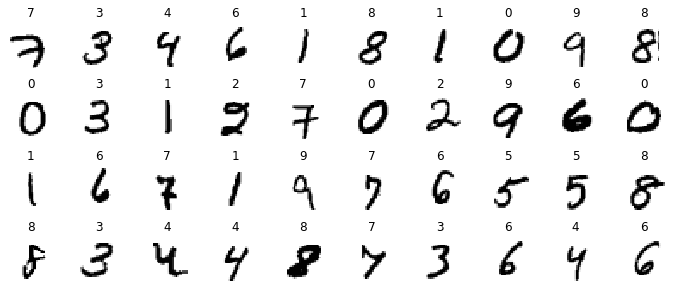

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import InputLayer

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=90, validation_data=(X_test, y_test))

Epoch 1/100
612/612 [==============================] - 8s 11ms/step - loss: 2.2584 - accuracy: 0.2558 - val_loss: 2.2093 - val_accuracy: 0.4017
Epoch 2/100
612/612 [==============================] - 3s 5ms/step - loss: 2.1517 - accuracy: 0.4755 - val_loss: 2.0801 - val_accuracy: 0.5420
Epoch 3/100
612/612 [==============================] - 3s 5ms/step - loss: 1.9909 - accuracy: 0.5839 - val_loss: 1.8758 - val_accuracy: 0.5921
Epoch 4/100
612/612 [==============================] - 3s 5ms/step - loss: 1.7503 - accuracy: 0.6432 - val_loss: 1.5978 - val_accuracy: 0.6697
Epoch 5/100
612/612 [==============================] - 3s 5ms/step - loss: 1.4681 - accuracy: 0.6946 - val_loss: 1.3206 - val_accuracy: 0.7387
Epoch 6/100
612/612 [==============================] - 3s 5ms/step - loss: 1.2193 - accuracy: 0.7447 - val_loss: 1.1016 - val_accuracy: 0.7685
Epoch 7/100
612/612 [==============================] - 3s 5ms/step - loss: 1.0335 - accuracy: 0.7753 - val_loss: 0.9457 - val_accuracy: 0.783

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2397 - accuracy: 0.9304


[0.23970288038253784, 0.930400013923645]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.94, 0.02, 0.  , 0.02, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

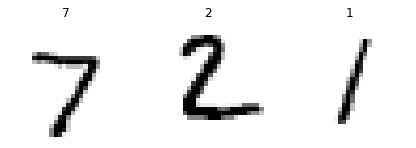

In [14]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()